In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import  RobustScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, SelectPercentile, GenericUnivariateSelect
from sklearn.feature_selection import RFE, RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import f_classif, chi2
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier, LassoCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline



# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

### Load train dataset

In [2]:
salaryClassification = pd.read_csv('data/training.csv', sep = ';')

#treat missing values
salaryClassification = salaryClassification.replace(' ?', np.NaN)
salaryClassification[' workclass'] = salaryClassification[' workclass'].replace(np.NaN, 'Unknown')
salaryClassification[' occupation'] = salaryClassification[' occupation'].replace(np.NaN, 'Other')
salaryClassification[' native-country'] = salaryClassification[' native-country'].replace(np.NaN, 'Other')


#convert 'workclass' from categorical to numeric
oe = OrdinalEncoder()
salaryClassification["workclass"] = oe.fit_transform(salaryClassification[[" workclass"]]).astype(int)
salaryClassification = salaryClassification.drop(' workclass', 1)

#fix column names
salaryClassification['fnlwgt'] = salaryClassification[' fnlwgt']
salaryClassification = salaryClassification.drop(' fnlwgt',1)

#convert 'education' from categorical to numeric
oe = OrdinalEncoder()
salaryClassification["education"] = oe.fit_transform(salaryClassification[[" education"]]).astype(int)
salaryClassification = salaryClassification.drop(' education', 1)

#fix column names
salaryClassification['education-num'] = salaryClassification[' education-num']
salaryClassification = salaryClassification.drop(' education-num',1)

#convert 'education' from categorical to numeric
oe = OrdinalEncoder()
salaryClassification["marital-status"] = oe.fit_transform(salaryClassification[[" marital-status"]]).astype(int)
salaryClassification = salaryClassification.drop(' marital-status', 1)

#convert 'occupation'n' from categorical to numeric
oe = OrdinalEncoder()
salaryClassification["occupation"] = oe.fit_transform(salaryClassification[[" occupation"]]).astype(int)
salaryClassification = salaryClassification.drop(' occupation', 1)

#convert 'relationship'n' from categorical to numeric
oe = OrdinalEncoder()
salaryClassification["relationship"] = oe.fit_transform(salaryClassification[[" relationship"]]).astype(int)
salaryClassification = salaryClassification.drop(' relationship', 1)

#convert 'race'n' from categorical to numeric
oe = OrdinalEncoder()
salaryClassification["race"] = oe.fit_transform(salaryClassification[[" race"]]).astype(int)
salaryClassification = salaryClassification.drop(' race', 1)

#convert 'sex'n' from categorical to numeric
oe = OrdinalEncoder()
salaryClassification["sex"] = oe.fit_transform(salaryClassification[[" sex"]]).astype(int)
salaryClassification = salaryClassification.drop(' sex', 1)

#join 2 columns(capital-gain and  capital-loss) in one
salaryClassification['capital-diff'] = salaryClassification[' capital-gain'] - salaryClassification[' capital-loss']
salaryClassification = salaryClassification.drop(' capital-gain', 1)
salaryClassification = salaryClassification.drop(' capital-loss', 1)

#fix column names
salaryClassification['hours-per-week'] = salaryClassification[' hours-per-week']
salaryClassification = salaryClassification.drop(' hours-per-week',1)


#convert 'native-country' from categorical to numeric
oe = OrdinalEncoder()
salaryClassification["native-county"] = oe.fit_transform(salaryClassification[[" native-country"]]).astype(int)
salaryClassification = salaryClassification.drop(' native-country', 1)


#convert salary-classification' from categorical to numeric
salaryClassification[' salary-classification'] = [x.replace(' <=50K', '0') for x in salaryClassification[' salary-classification']]
salaryClassification[' salary-classification'] = [x.replace(' >50K', '1') for x in salaryClassification[' salary-classification']]
salaryClassification[' salary-classification'] = salaryClassification[' salary-classification'].astype(int)

salaryClassification['salary-classification'] = salaryClassification[' salary-classification']
salaryClassification = salaryClassification.drop(' salary-classification',1)

X_train = salaryClassification.drop('salary-classification', 1)
y_train =  salaryClassification['salary-classification']

### Load test dataset

In [3]:
testData = pd.read_csv('data/test.csv', sep = ';')

#treat missing values
testData = testData.replace(' ?', np.NaN)
testData[' workclass'] = testData[' workclass'].replace(np.NaN, 'Unknown')
testData[' occupation'] = testData[' occupation'].replace(np.NaN, 'Other')
testData[' native-country'] = testData[' native-country'].replace(np.NaN, 'Other')


#convert 'workclass' from categorical to numeric
oe = OrdinalEncoder()
testData["workclass"] = oe.fit_transform(testData[[" workclass"]]).astype(int)
testData = testData.drop(' workclass', 1)

#fix column name
testData['fnlwgt'] = testData[' fnlwgt']
testData = testData.drop(' fnlwgt',1)

#convert 'education' from categorical to numeric
oe = OrdinalEncoder()
testData["education"] = oe.fit_transform(testData[[" education"]]).astype(int)
testData = testData.drop(' education', 1)

#fix column name
testData['education-num'] = testData[' education-num']
testData = testData.drop(' education-num',1)

#convert 'education' from categorical to numeric
oe = OrdinalEncoder()
testData["marital-status"] = oe.fit_transform(testData[[" marital-status"]]).astype(int)
testData = testData.drop(' marital-status', 1)

#convert 'occupation'n' from categorical to numeric
oe = OrdinalEncoder()
testData["occupation"] = oe.fit_transform(testData[[" occupation"]]).astype(int)
testData = testData.drop(' occupation', 1)

#convert 'relationship'n' from categorical to numeric
oe = OrdinalEncoder()
testData["relationship"] = oe.fit_transform(testData[[" relationship"]]).astype(int)
testData = testData.drop(' relationship', 1)

#convert 'race'n' from categorical to numeric
oe = OrdinalEncoder()
testData["race"] = oe.fit_transform(testData[[" race"]]).astype(int)
testData = testData.drop(' race', 1)

#convert 'sex'n' from categorical to numeric
oe = OrdinalEncoder()
testData["sex"] = oe.fit_transform(testData[[" sex"]]).astype(int)
testData = testData.drop(' sex', 1)

#join 2 columns(capital-gain and  capital-loss) in one
testData['capital-diff'] = testData[' capital-gain'] - testData[' capital-loss']
testData = testData.drop(' capital-gain', 1)
testData = testData.drop(' capital-loss', 1)

#fix column name
testData['hours-per-week'] = testData[' hours-per-week']
testData = testData.drop(' hours-per-week',1)


#convert 'native-country' from categorical to numeric
oe = OrdinalEncoder()
testData["native-county"] = oe.fit_transform(testData[[" native-country"]]).astype(int)
testData = testData.drop(' native-country', 1)


#convert salary-classification' from categorical to numeric
testData[' salary-classification'] = [x.replace(' <=50K', '0') for x in testData[' salary-classification']]
testData[' salary-classification'] = [x.replace(' >50K', '1') for x in testData[' salary-classification']]
testData[' salary-classification'] = testData[' salary-classification'].astype(int)

testData['salary-classification'] = testData[' salary-classification']
testData = testData.drop(' salary-classification',1)

X_test = testData.drop('salary-classification', 1)
y_test =  testData['salary-classification']

### Funções auxiliares

In [4]:
def robustScalingTest(train,test):
    scaler = RobustScaler()
    scaledData = scaler.fit_transform(train)
    scaledTest = scaler.transform(test)
    return scaledData, scaledTest;

def overSampler(X_train, y_train):
    ros = RandomOverSampler()
    X_balanced, y_train = ros.fit_sample(X_train, y_train)
    X_balanced, y_train = shuffle(X_balanced, y_train)
    return X_balanced, y_train;

def evaluateSelector(featureSelector, selectorName):
    X_train = salaryClassification.drop('salary-classification', 1)
    y_train =  salaryClassification['salary-classification']
    X_test = testData.drop('salary-classification', 1)
    y_test =  testData['salary-classification']
    
  # Feature Selection
    X_train_selected, X_test_selected = featureSelector(X_train, y_train, X_test)
    
    # standardizar
    X_train_transformed, X_test_transformed = robustScalingTest(X_train_selected, X_test_selected)
    
    classifiers = [
        LogisticRegression(max_iter=100),
        SGDClassifier(), KNeighborsClassifier(n_neighbors=5),
        SVC(), GaussianNB(),
        DecisionTreeClassifier(), MLPClassifier(max_iter=10000),
        AdaBoostClassifier(), RandomForestClassifier(),
    ]

    names = [
             "Logistic regression", "SGDClassifier",
             "KNearest Neighbors (5)", 
             "SVM-rbf","Gaussian naive bayes",
             "Decision Tree", "Multi-layer Perceptron", 
             "AdaBoost", "Random Forest"
    ]
    
    # Treinar e avaliar modelos
    for name, clf in zip(names, classifiers):
        clf.fit(X_train_transformed, y_train)
        predicted = clf.predict(X_test_transformed)
        evaluateModel(name + " com " + selectorName, y_test, predicted)
    return;

def evaluateModelBasedSelector(featureSelector, model, name):
    X_train = salaryClassification.drop('salary-classification', 1)
    y_train =  salaryClassification['salary-classification']
    X_test = testData.drop('salary-classification', 1)
    y_test =  testData['salary-classification']

    # Feature Selection
    X_train_selected, X_test_selected = featureSelector(X_train, y_train, X_test)
    
    
    # Normalizar, discretizar ou standardizar
    X_train_transformed, X_test_transformed = robustScalingTest(X_train_selected, X_test_selected)
    
    # Treinar modelo
    model.fit(X_train_transformed, y_train)
    
    # Prever resultados para test set
    predicted = model.predict(X_test_transformed)
    
    # Avaliar modelo
    evaluateModel(name, y_test, predicted)
    return;

def evaluateModel(name, y_test, predicted):
    print("Accuracy: %0.3f | AUROC %0.3f | (Accuracy, Precision) 0:( %0.3f, %0.3f)  1:( %0.3f, %0.3f) ||" 
              % (accuracy_score(y_test,predicted), roc_auc_score(y_test, predicted),
                recall_score(y_test,predicted,pos_label=0), precision_score(y_test,predicted,pos_label=0),
                recall_score(y_test,predicted,pos_label=1), precision_score(y_test,predicted,pos_label=1)), name)
    return;


def getPickedFeatures(selector, data):
    selected_features_index = selector.get_support(indices=True)
    dropped_features_index = list( set(list(range(0, data.columns.size))) - (set(selected_features_index)))

    selected_features_names = list(data.columns[selected_features_index])
    return selected_features_names;


def getDroppedFeatures(selector, data):
    selected_features_index = selector.get_support(indices=True)
    dropped_features_index = list( set(list(range(0, data.columns.size))) - (set(selected_features_index)))

    dropped_features_names = list(data.columns[dropped_features_index])
    return dropped_features_names;


def printFeatureSelection(selector, data):
    selected_features_index = selector.get_support(indices=True)
    dropped_features_index = list( set(list(range(0, data.columns.size))) - (set(selected_features_index)))

    selected_features_names = zip(selected_features_index,  list(data.columns[selected_features_index]))
    dropped_features_names = zip(dropped_features_index, list(data.columns[dropped_features_index]))

    print("Features mantidas:")
    for cn in selected_features_names:
        print("\t" + str(cn))

    print("Features eliminadas:")
    for cn in dropped_features_names:
        print("\t" + str(cn))
    return;

# Feature Selection

## VarianceThreshold

In [5]:
def selectVarianceThreshold(X_train, y_train, X_test):
    varianceThreshold_selector = VarianceThreshold()
    selector = varianceThreshold_selector.fit(X_train, y_train)
    printFeatureSelection(selector, X_train)
    X_train_selected = varianceThreshold_selector.transform(X_train)
    X_test_selected = varianceThreshold_selector.transform(X_test)
    
    return X_train_selected, X_test_selected;

In [16]:
# Remove features with low variance

evaluateSelector(selectVarianceThreshold, "VarianceThreshold")

Features mantidas:
	(0, 'age')
	(1, 'workclass')
	(2, 'fnlwgt')
	(3, 'education')
	(4, 'education-num')
	(5, 'marital-status')
	(6, 'occupation')
	(7, 'relationship')
	(8, 'race')
	(9, 'sex')
	(10, 'capital-diff')
	(11, 'hours-per-week')
	(12, 'native-county')
Features eliminadas:
Accuracy: 0.821 | AUROC 0.685 | (Accuracy, Precision) 0:( 0.942, 0.842)  1:( 0.429, 0.695) || Logistic regression com VarianceThreshold
Accuracy: 0.753 | AUROC 0.690 | (Accuracy, Precision) 0:( 0.810, 0.859)  1:( 0.570, 0.481) || SGDClassifier com VarianceThreshold
Accuracy: 0.846 | AUROC 0.767 | (Accuracy, Precision) 0:( 0.916, 0.886)  1:( 0.617, 0.695) || KNearest Neighbors (5) com VarianceThreshold
Accuracy: 0.802 | AUROC 0.618 | (Accuracy, Precision) 0:( 0.968, 0.810)  1:( 0.269, 0.719) || SVM-rbf com VarianceThreshold
Accuracy: 0.817 | AUROC 0.646 | (Accuracy, Precision) 0:( 0.970, 0.822)  1:( 0.323, 0.768) || Gaussian naive bayes com VarianceThreshold
Accuracy: 0.808 | AUROC 0.738 | (Accuracy, Precision

## SelectKBest

Select K value

In [17]:
kbest_svc_accuracy = []
kbest_knn_accuracy = []
kbest_logreg_accuracy = []

for i in range(1,14):    
    X_train_transformed, X_test_transformed = robustScalingTest(X_train, X_test)
    X_train_balanced, y_train_balanced = overSampler(X_train_transformed, y_train)
    
    selectKBest = SelectKBest(f_classif, k=i)
    selectKBest.fit(X_train_balanced,y_train_balanced)
    X_train_selected = selectKBest.transform(X_train_balanced)
    X_test_selected = selectKBest.transform(X_test_transformed)
    
    svc = SVC().fit(X_train_selected, y_train_balanced)
    pred_i_svc_kbest = svc.predict(X_test_selected)
    pred_i_svc_kbest_accuracy = accuracy_score(y_test, pred_i_svc_kbest)
    kbest_svc_accuracy.append(pred_i_svc_kbest_accuracy)

    knn = KNeighborsClassifier(n_neighbors=5).fit(X_train_selected, y_train_balanced)
    pred_i_knn_kbest = knn.predict(X_test_selected)
    pred_i_knn_kbest_accuracy = accuracy_score(y_test, pred_i_knn_kbest)
    kbest_knn_accuracy.append(pred_i_knn_kbest_accuracy)

    logreg = LogisticRegression(max_iter=10000).fit(X_train_selected, y_train_balanced)
    pred_i_logreg_kbest = logreg.predict(X_test_selected)
    pred_i_logreg_kbest_accuracy = accuracy_score(y_test, pred_i_logreg_kbest)
    kbest_logreg_accuracy.append(pred_i_logreg_kbest_accuracy)

Text(0, 0.5, 'Accuracy')

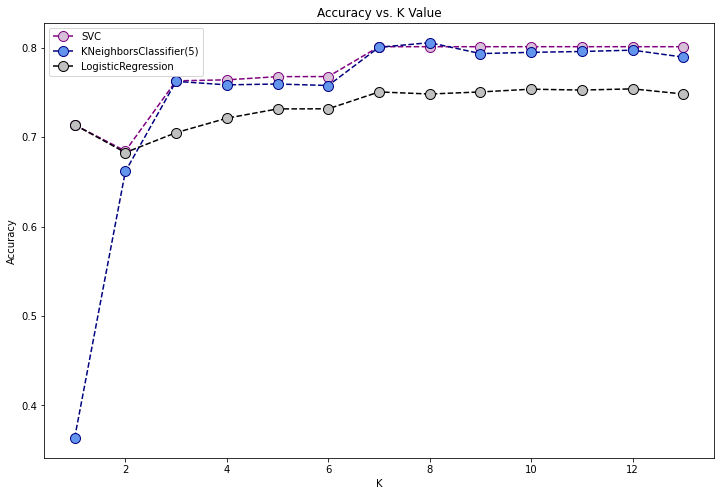

In [18]:
plt.figure(figsize=(12,8))
plt.plot(range(1,14),kbest_svc_accuracy, color='purple', linestyle='dashed', marker='o',
         markerfacecolor='thistle', markersize=10, label='SVC')
plt.plot(range(1,14),kbest_knn_accuracy, color='navy', linestyle='dashed', marker='o',
         markerfacecolor='cornflowerblue', markersize=10, label='KNeighborsClassifier(5)')
plt.plot(range(1,14),kbest_logreg_accuracy, color='black', linestyle='dashed', marker='o',
         markerfacecolor='silver', markersize=10, label='LogisticRegression')
plt.legend()
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [5]:
def selectKBest_f_classif(X_train, y_train, X_test):
    kbest_selector_f_classif = SelectKBest(f_classif, k=7)
    selector = kbest_selector_f_classif.fit(X_train, y_train)
    printFeatureSelection(selector, X_train)
    X_train_selected = kbest_selector_f_classif.transform(X_train)
    X_test_selected = kbest_selector_f_classif.transform(X_test)
    
    return X_train_selected, X_test_selected;

def selectKBest_chi2(X_train, y_train, X_test):
    kbest_selector_chi2 = SelectKBest(chi2, k=7)
    selector = kbest_selector_chi2.fit(X_train, y_train)
    printFeatureSelection(selector, X_train)
    X_train_selected = kbest_selector_chi2.transform(X_train)
    X_test_selected = kbest_selector_chi2.transform(X_test)
    
    return X_train_selected, X_test_selected;

In [8]:
# Univariate feature selection
print("Com f_classif\n\n")
evaluateSelector(selectKBest_f_classif, "Select k best f_classif")

Com f_classif


Features mantidas:
	(0, 'age')
	(4, 'education-num')
	(5, 'marital-status')
	(7, 'relationship')
	(9, 'sex')
	(10, 'capital-diff')
	(11, 'hours-per-week')
Features eliminadas:
	(1, 'workclass')
	(2, 'fnlwgt')
	(3, 'education')
	(6, 'occupation')
	(8, 'race')
	(12, 'native-county')
Accuracy: 0.820 | AUROC 0.685 | (Accuracy, Precision) 0:( 0.940, 0.842)  1:( 0.430, 0.691) || Logistic regression com Select k best f_classif
Accuracy: 0.803 | AUROC 0.685 | (Accuracy, Precision) 0:( 0.909, 0.845)  1:( 0.460, 0.610) || SGDClassifier com Select k best f_classif
Accuracy: 0.846 | AUROC 0.771 | (Accuracy, Precision) 0:( 0.914, 0.888)  1:( 0.628, 0.693) || KNearest Neighbors (5) com Select k best f_classif
Accuracy: 0.802 | AUROC 0.618 | (Accuracy, Precision) 0:( 0.968, 0.810)  1:( 0.269, 0.719) || SVM-rbf com Select k best f_classif
Accuracy: 0.808 | AUROC 0.622 | (Accuracy, Precision) 0:( 0.975, 0.812)  1:( 0.270, 0.768) || Gaussian naive bayes com Select k best f_classif
Accura

## Select Percentile

In [15]:
def selectPercentile_f_classif(X_train, y_train, X_test):
    percentile_selector_f_classif = SelectPercentile(f_classif, percentile=10)
    selector = percentile_selector_f_classif.fit(X_train, y_train)
    printFeatureSelection(selector, X_train)
    X_train_selected = percentile_selector_f_classif.transform(X_train)
    X_test_selected = percentile_selector_f_classif.transform(X_test)
    
    return X_train_selected, X_test_selected;

def selectPercentile_chi2(X_train, y_train, X_test):
    percentile_selector_chi2 = SelectPercentile(chi2, percentile=10)
    selector = percentile_selector_chi2.fit(X_train, y_train)
    printFeatureSelection(selector, X_train)
    X_train_selected = percentile_selector_chi2.transform(X_train)
    X_test_selected = percentile_selector_chi2.transform(X_test)
    
    return X_train_selected, X_test_selected;

In [16]:
print("Com f_classif\n\n")
evaluateSelector(selectPercentile_f_classif, "Select Percentile")

Com f_classif


Features mantidas:
	(4, 'education-num')
	(7, 'relationship')
Features eliminadas:
	(0, 'age')
	(1, 'workclass')
	(2, 'fnlwgt')
	(3, 'education')
	(5, 'marital-status')
	(6, 'occupation')
	(8, 'race')
	(9, 'sex')
	(10, 'capital-diff')
	(11, 'hours-per-week')
	(12, 'native-county')
Accuracy: 0.806 | AUROC 0.665 | (Accuracy, Precision) 0:( 0.933, 0.833)  1:( 0.396, 0.646) || Logistic regression com Select Percentile
Accuracy: 0.764 | AUROC 0.500 | (Accuracy, Precision) 0:( 1.000, 0.764)  1:( 0.000, 0.000) || SGDClassifier com Select Percentile


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.799 | AUROC 0.688 | (Accuracy, Precision) 0:( 0.899, 0.848)  1:( 0.478, 0.594) || KNearest Neighbors (5) com Select Percentile
Accuracy: 0.824 | AUROC 0.694 | (Accuracy, Precision) 0:( 0.940, 0.846)  1:( 0.447, 0.697) || SVM-rbf com Select Percentile
Accuracy: 0.806 | AUROC 0.665 | (Accuracy, Precision) 0:( 0.933, 0.833)  1:( 0.396, 0.646) || Gaussian naive bayes com Select Percentile
Accuracy: 0.822 | AUROC 0.687 | (Accuracy, Precision) 0:( 0.943, 0.843)  1:( 0.432, 0.700) || Decision Tree com Select Percentile
Accuracy: 0.824 | AUROC 0.695 | (Accuracy, Precision) 0:( 0.939, 0.847)  1:( 0.452, 0.695) || Multi-layer Perceptron com Select Percentile
Accuracy: 0.822 | AUROC 0.678 | (Accuracy, Precision) 0:( 0.950, 0.838)  1:( 0.407, 0.716) || AdaBoost com Select Percentile
Accuracy: 0.822 | AUROC 0.687 | (Accuracy, Precision) 0:( 0.943, 0.843)  1:( 0.432, 0.700) || Random Forest com Select Percentile


## GenericUnivariateSelect

In [35]:
def selectGenericUnivariateSelect(X_train, y_train, X_test):
    gus_selector = GenericUnivariateSelect(f_classif, mode='k_best', param=7)
    selector = gus_selector.fit(X_train, y_train)
    printFeatureSelection(selector, X_train)
    X_train_selected = gus_selector.transform(X_train)
    X_test_selected = gus_selector.transform(X_test)
    
    return X_train_selected, X_test_selected;

In [36]:
evaluateSelector(selectGenericUnivariateSelect, "Generic univariate select")

Features mantidas:
	(0, 'age')
	(4, 'education-num')
	(5, 'marital-status')
	(7, 'relationship')
	(9, 'sex')
	(10, 'capital-diff')
	(11, 'hours-per-week')
Features eliminadas:
	(1, 'workclass')
	(2, 'fnlwgt')
	(3, 'education')
	(6, 'occupation')
	(8, 'race')
	(12, 'native-county')
Accuracy: 0.820 | AUROC 0.685 | (Accuracy, Precision) 0:( 0.940, 0.842)  1:( 0.430, 0.691) || Logistic regression com Generic univariate select
Accuracy: 0.799 | AUROC 0.691 | (Accuracy, Precision) 0:( 0.894, 0.850)  1:( 0.489, 0.589) || SGDClassifier com Generic univariate select
Accuracy: 0.846 | AUROC 0.771 | (Accuracy, Precision) 0:( 0.914, 0.888)  1:( 0.628, 0.693) || KNearest Neighbors (5) com Generic univariate select
Accuracy: 0.802 | AUROC 0.618 | (Accuracy, Precision) 0:( 0.968, 0.810)  1:( 0.269, 0.719) || SVM-rbf com Generic univariate select
Accuracy: 0.808 | AUROC 0.622 | (Accuracy, Precision) 0:( 0.975, 0.812)  1:( 0.270, 0.768) || Gaussian naive bayes com Generic univariate select
Accuracy: 0.

## Recursive Feature Elimination

In [35]:
def rfeLogReg(X_train, y_train, X_test):
    rfe_log_selector = RFE(LogisticRegression(), 12)
    selector = rfe_log_selector.fit(X_train, y_train)
    printFeatureSelection(selector, X_train)
    X_train_selected = rfe_log_selector.transform(X_train)
    X_test_selected = rfe_log_selector.transform(X_test)
    
    return X_train_selected, X_test_selected;


def rfeSVC(X_train, y_train, X_test):
    rfe_svc_selector = RFE(SVC(), 12)
    selector = rfe_svc_selector.fit(X_train, y_train)
    printFeatureSelection(selector, X_train)
    X_train_selected = rfe_svc_selector.transform(X_train)
    X_test_selected = rfe_svc_selector.transform(X_test)
    
    return X_train_selected, X_test_selected;

In [36]:
# Recursive feature elimination

evaluateModelBasedSelector( rfeLogReg,  LogisticRegression(), "Log Reg w/ RFE LogReg")

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Features mantidas:
	(0, 'age')
	(1, 'workclass')
	(3, 'education')
	(4, 'education-num')
	(5, 'marital-status')
	(6, 'occupation')
	(7, 'relationship')
	(8, 'race')
	(9, 'sex')
	(10, 'capital-diff')
	(11, 'hours-per-week')
	(12, 'native-county')
Features eliminadas:
	(2, 'fnlwgt')
Accuracy: 0.820 | AUROC 0.690 | (Accuracy, Precision) 0:( 0.937, 0.845)  1:( 0.443, 0.683) || Log Reg w/ RFE LogReg


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Recursive Feature Elimination w/ Cross Validation

In [13]:
def rfeCvLogReg(X_train, y_train, X_test):
    rfecv_log_selector = RFECV(LogisticRegression(), 12)
    selector = rfecv_log_selector.fit(X_train, y_train)
    printFeatureSelection(selector, X_train)
    X_train_selected = rfecv_log_selector.transform(X_train)
    X_test_selected = rfecv_log_selector.transform(X_test)
    
    return X_train_selected, X_test_selected;

def rfeCvSVC(X_train, y_train, X_test):
    rfecv_svc_selector = RFECV(SVC(), 12)
    selector = rfecv_svc_selector.fit(X_train, y_train)
    printFeatureSelection(selector, X_train)
    X_train_selected = rfecv_svc_selector.transform(X_train)
    X_test_selected = rfecv_svc_selector.transform(X_test)
    
    return X_train_selected, X_test_selected;

In [14]:
# Recursive feature elimination
evaluateModelBasedSelector( rfeCvLogReg, LogisticRegression(), "Log Reg w/ RFE Cross Validation LogReg")

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Features mantidas:
	(0, 'age')
	(1, 'workclass')
	(2, 'fnlwgt')
	(3, 'education')
	(4, 'education-num')
	(5, 'marital-status')
	(6, 'occupation')
	(7, 'relationship')
	(8, 'race')
	(9, 'sex')
	(10, 'capital-diff')
	(11, 'hours-per-week')
	(12, 'native-county')
Features eliminadas:
Accuracy: 0.820 | AUROC 0.690 | (Accuracy, Precision) 0:( 0.937, 0.845)  1:( 0.443, 0.684) || Log Reg w/ RFE Cross Validation LogReg


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## SelectFromModel Tree-based

In [5]:
def sfmTree(X_train, y_train, X_test):
    tree_selector = ExtraTreesClassifier(n_estimators=50)
    selector = tree_selector.fit(X_train, y_train)
    sfm_Tree_selector = SelectFromModel(tree_selector, prefit=True)
    X_train_selected = sfm_Tree_selector.transform(X_train)
    X_test_selected = sfm_Tree_selector.transform(X_test)
    
    return X_train_selected, X_test_selected;

In [6]:
# Feature selection using SelectFromModel

evaluateModelBasedSelector( sfmTree, SVC(), "SVC w/ SelectFromModel Tree")

Accuracy: 0.802 | AUROC 0.618 | (Accuracy, Precision) 0:( 0.968, 0.810)  1:( 0.269, 0.719) || SVC Linear w/ SelectFromModel Tree


### PCA

In [25]:
def selectPCA(X_train, y_train, X_test):
    pca_selector = PCA(n_components=2)
    selector = pca_selector.fit(X_train, y_train)
    #print(pd.DataFrame(selector.components_,columns=X_train.columns,index = ['0','1']))
    X_train_selected = pca_selector.transform(X_train)
    X_test_selected = pca_selector.transform(X_test)
    
    return X_train_selected, X_test_selected;

In [26]:
evaluateSelector(selectPCA, "PCA")

Accuracy: 0.804 || AUROC 0.590 || (Accuracy, Precision) 0:( 0.995, 0.798)  1:( 0.185, 0.916) -> Logistic regression com PCA
Accuracy: 0.783 || AUROC 0.585 || (Accuracy, Precision) 0:( 0.959, 0.797)  1:( 0.212, 0.615) -> SGDClassifier com PCA
Accuracy: 0.806 || AUROC 0.661 || (Accuracy, Precision) 0:( 0.936, 0.831)  1:( 0.385, 0.652) -> KNearest Neighbors (5) com PCA
Accuracy: 0.802 || AUROC 0.618 || (Accuracy, Precision) 0:( 0.968, 0.810)  1:( 0.269, 0.719) -> SVM-rbf com PCA
Accuracy: 0.796 || AUROC 0.594 || (Accuracy, Precision) 0:( 0.976, 0.800)  1:( 0.213, 0.732) -> Gaussian naive bayes com PCA
Accuracy: 0.756 || AUROC 0.664 || (Accuracy, Precision) 0:( 0.839, 0.842)  1:( 0.490, 0.484) -> Decision Tree com PCA
Accuracy: 0.786 || AUROC 0.621 || (Accuracy, Precision) 0:( 0.934, 0.814)  1:( 0.308, 0.592) -> Multi-layer Perceptron com PCA
Accuracy: 0.821 || AUROC 0.629 || (Accuracy, Precision) 0:( 0.992, 0.814)  1:( 0.267, 0.913) -> AdaBoost com PCA
Accuracy: 0.786 || AUROC 0.666 || (A